# MCE Analysis

In [1]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
import time
import datetime
import scipy
import glob
import os



In [2]:
#importing data and identifying the corruption types

mce = pd.read_csv('C:/Users/basus/OneDrive/Desktop/analysis/mce_error.csv')
rel_error = pd.read_csv('C:/Users/basus/OneDrive/Desktop/analysis/rel_mce_error.csv')

raw_accuracy = pd.read_csv('C:/Users/basus/OneDrive/Desktop/analysis/raw_accuracy.csv')
raw_error = pd.read_csv('C:/Users/basus/OneDrive/Desktop/analysis/raw_error.csv')

print (mce.head())
print (rel_error.head())

print (raw_accuracy.head())
print (raw_error.head())

noise = ['gaussian_noise','shot_noise','impulse_noise']
blur= ['defocus_blur','glass_blur','motion_blur','zoom_blur']
weather = ['frost','snow','fog','brightness']
digital = ['contrast','elastic_transform','pixelate','jpeg_compression']
extra = ['speckle_noise','spatter','gaussian_blur','saturate']

               ctype  FT-O-AugMix  Baseline (fc-O)      FT-O    FT-F20  \
0         brightness     1.180867           0.1338  0.829596  1.411061   
1           contrast     0.969928           0.4722  0.989411  1.001271   
2       defocus_blur     1.112745           0.4080  1.178431  1.453431   
3  elastic_transform     0.908360           0.2488  0.740354  0.986334   
4                fog     0.680634           0.3914  0.731221  0.718447   

    FT-F20C  FT-F20C-AugMix    FT-F5C  FT-F100C  FT-FALLC  FT-FALLC-AugMix  
0  0.881913        1.025411  0.802691  1.418535  1.115097         1.137519  
1  0.776789        0.788649  0.885218  0.711139  0.646760         0.675561  
2  1.007843        1.063235  0.909804  1.160784  1.048039         0.926961  
3  0.721061        0.909968  0.776527  0.920418  0.759646         0.913183  
4  0.574348        0.586612  0.710782  0.644354  0.572816         0.632090  
               ctype  FT-O-AugMix  Baseline (fc-O)      FT-O    FT-F20  \
0         brightnes

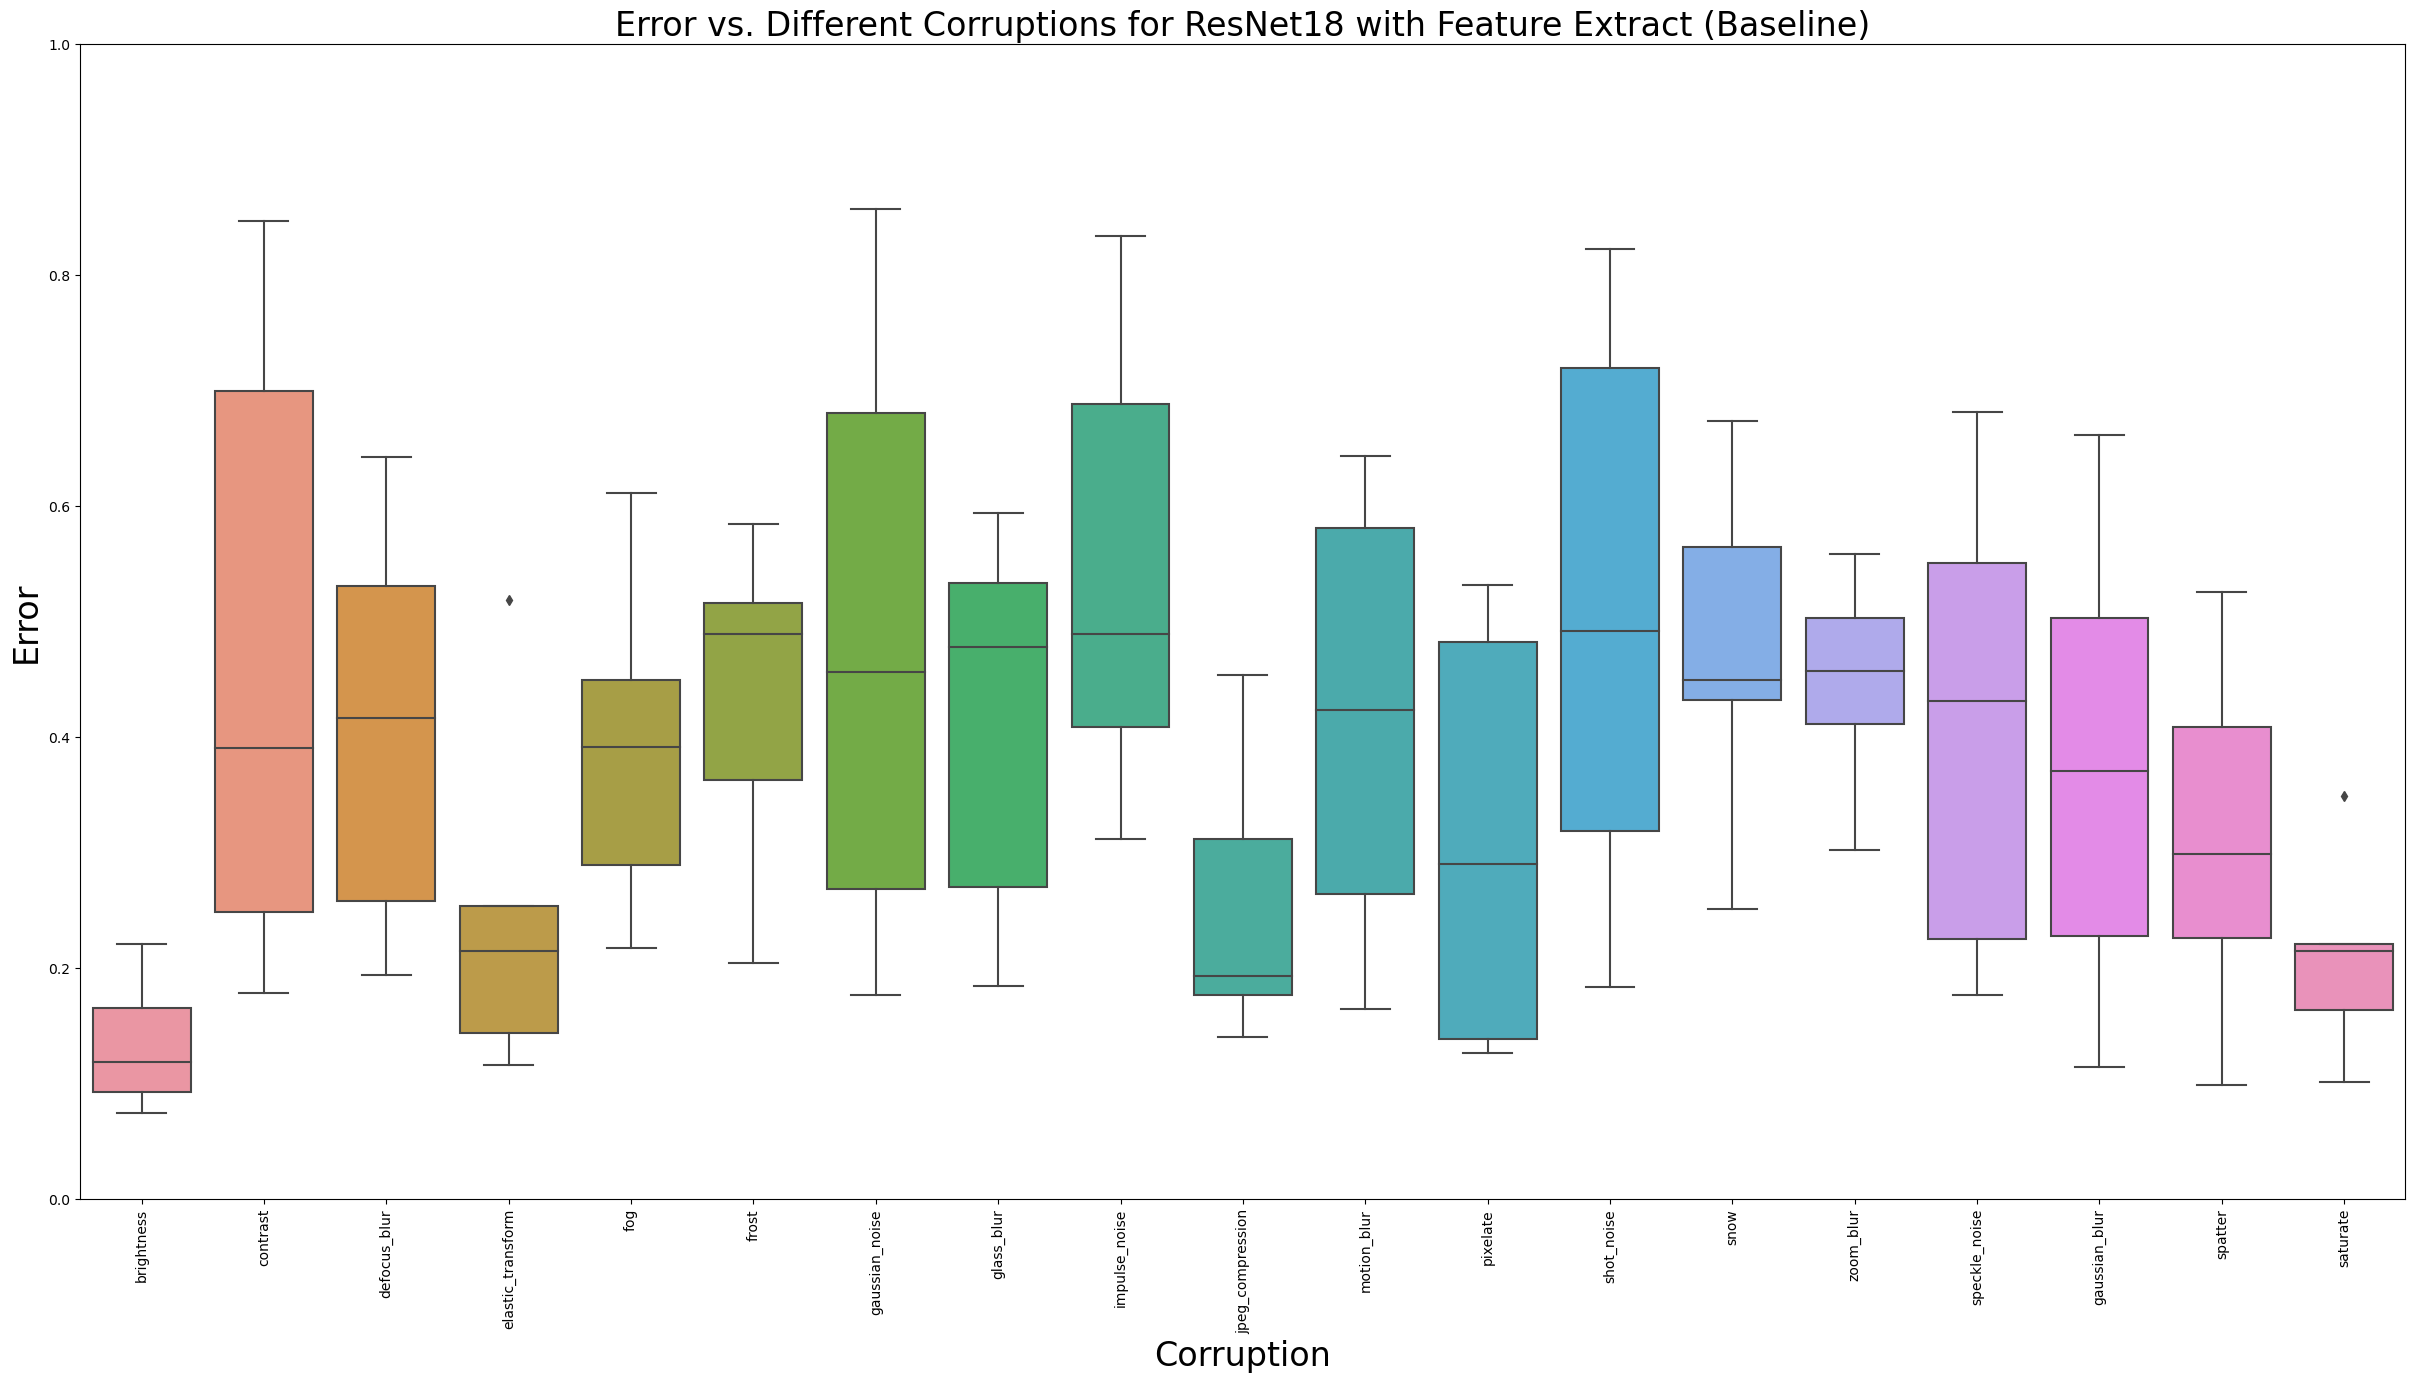

In [3]:
#plotting the data: Harder to classify corruptions


fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.boxplot(x="Corruptions", y="Baseline (fc-O)",data=raw_error)

plt.xticks(rotation=90)

plt.rcParams.update({'font.size':16})
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
plt.xlabel("Corruption", fontsize=24)
plt.ylabel("Error",fontsize=24)
plt.ylim(0,1)
plt.title("Error vs. Different Corruptions for ResNet18 with Feature Extract (Baseline)",fontsize=24)

#plt.legend(loc='upper right',fontsize=12)
#plt.grid()
plt.savefig('Baseline model error across corruptions.jpeg')
plt.show()



## MCE

                 ctype Model_Experiments     Error
0           brightness       FT-O-AugMix  1.180867
1             contrast       FT-O-AugMix  0.969928
2         defocus_blur       FT-O-AugMix  1.112745
3    elastic_transform       FT-O-AugMix  0.908360
4                  fog       FT-O-AugMix  0.680634
..                 ...               ...       ...
205      gaussian_blur   FT-FALLC-AugMix  0.945600
206            spatter   FT-FALLC-AugMix  0.801929
207           saturate   FT-FALLC-AugMix  1.159503
208              Clean   FT-FALLC-AugMix  0.096000
209                MCE   FT-FALLC-AugMix  0.808499

[189 rows x 3 columns]


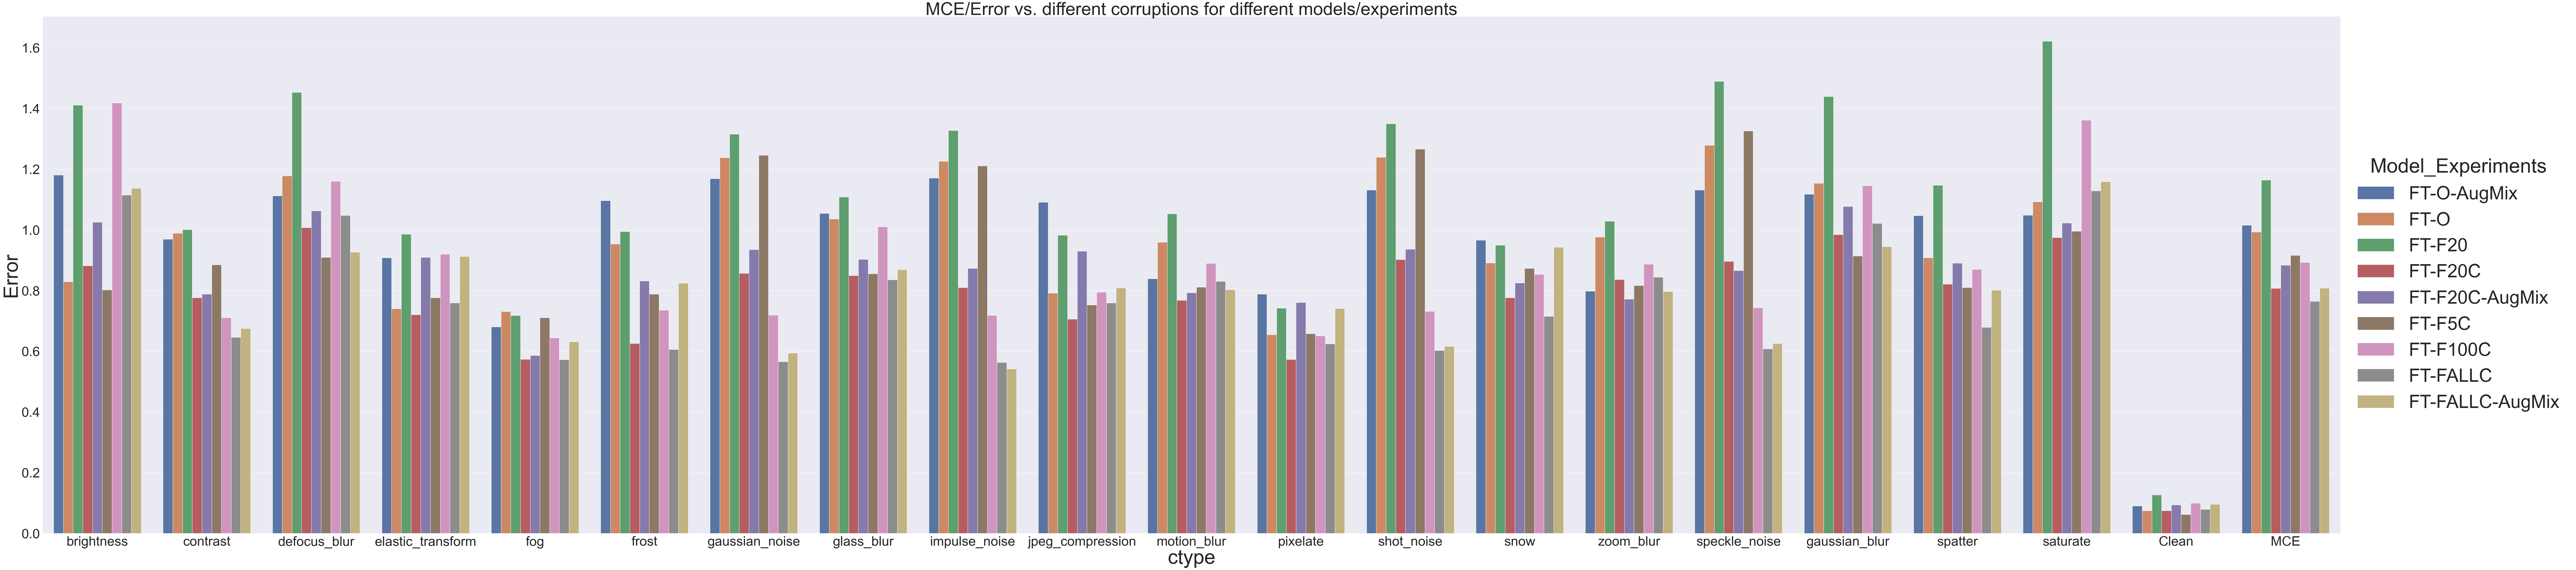

In [4]:
# comparing MCE across different models

temp_mce_df = pd.melt(mce,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Error"})

temp_mce_df = temp_mce_df[temp_mce_df['Model_Experiments']!='Baseline (fc-O)']
print (temp_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Error',hue='Model_Experiments',data=temp_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("MCE/Error vs. different corruptions for different models/experiments",fontsize=64)
g.savefig('MCE_Error vs diff corruptions.jpeg')
plt.show()


                ctype Model_Experiments     Error
0          brightness              FT-O  0.829596
1            contrast              FT-O  0.989411
2        defocus_blur              FT-O  1.178431
3   elastic_transform              FT-O  0.740354
4                 fog              FT-O  0.731221
..                ...               ...       ...
79      gaussian_blur   FT-FALLC-AugMix  0.945600
80            spatter   FT-FALLC-AugMix  0.801929
81           saturate   FT-FALLC-AugMix  1.159503
82              Clean   FT-FALLC-AugMix  0.096000
83                MCE   FT-FALLC-AugMix  0.808499

[84 rows x 3 columns]


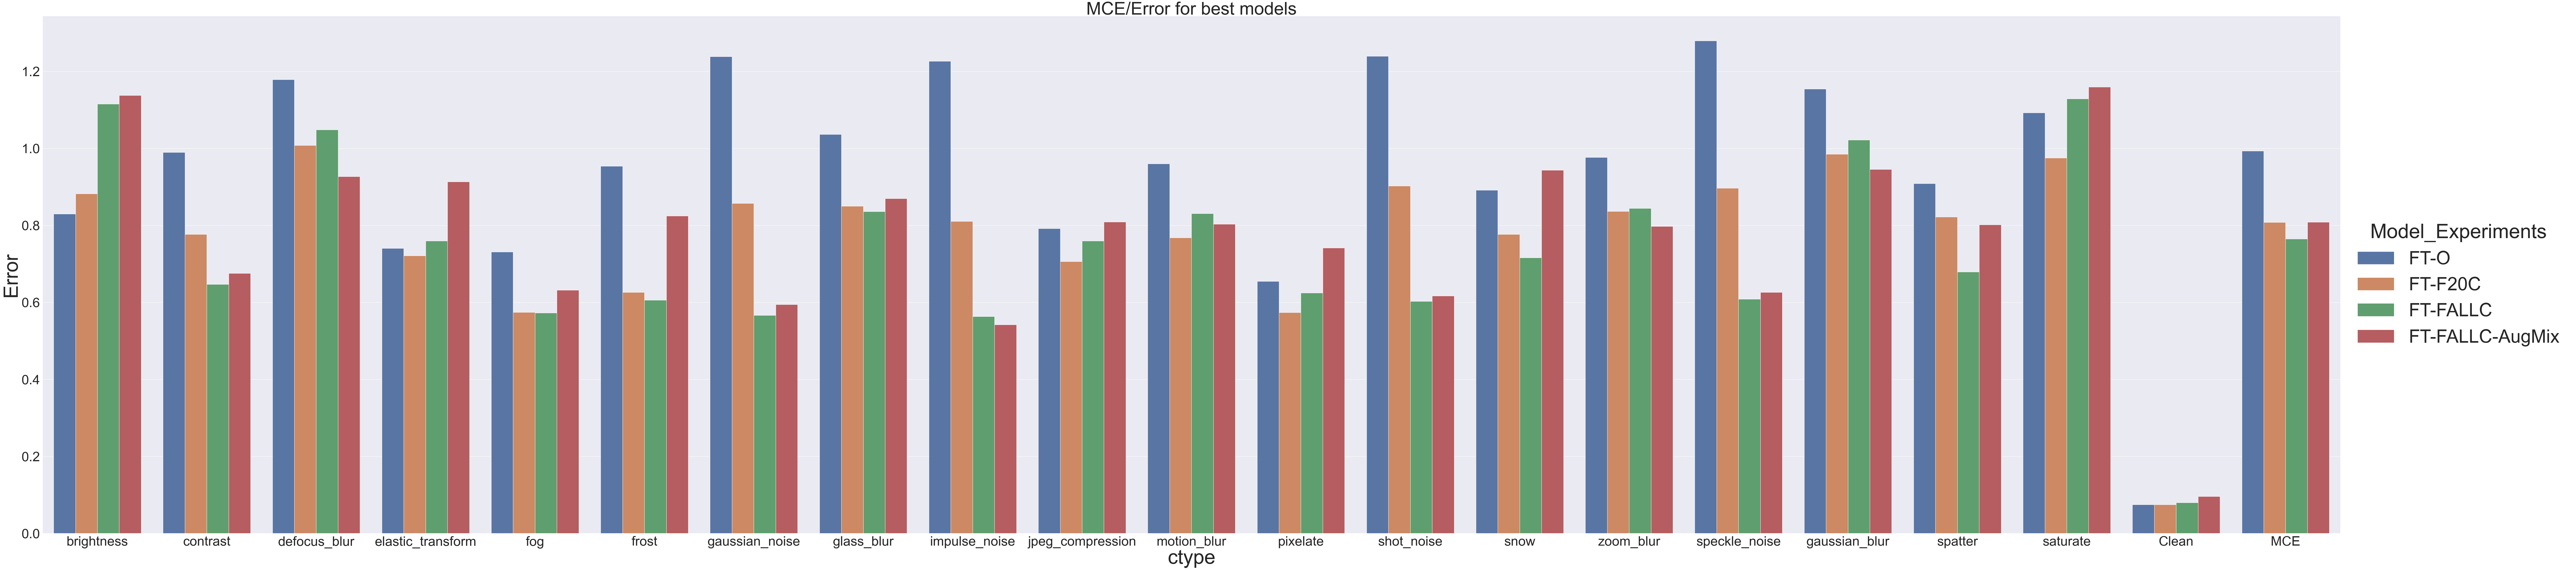

In [5]:
# comparing MCE across best models
temp_mce = mce[['ctype','FT-O','FT-F20C','FT-FALLC','FT-FALLC-AugMix']]
temp_mce_df = pd.melt(temp_mce,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Error"})


print (temp_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Error',hue='Model_Experiments',data=temp_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("MCE/Error for best models",fontsize=64)
g.savefig('MCE_Error for best models.jpeg')
plt.show()

                ctype Model_Experiments     Error
0          brightness            FT-F5C  0.802691
1            contrast            FT-F5C  0.885218
2        defocus_blur            FT-F5C  0.909804
3   elastic_transform            FT-F5C  0.776527
4                 fog            FT-F5C  0.710782
..                ...               ...       ...
79      gaussian_blur          FT-FALLC  1.021867
80            spatter          FT-FALLC  0.679100
81           saturate          FT-FALLC  1.128940
82              Clean          FT-FALLC  0.080000
83                MCE          FT-FALLC  0.764777

[84 rows x 3 columns]


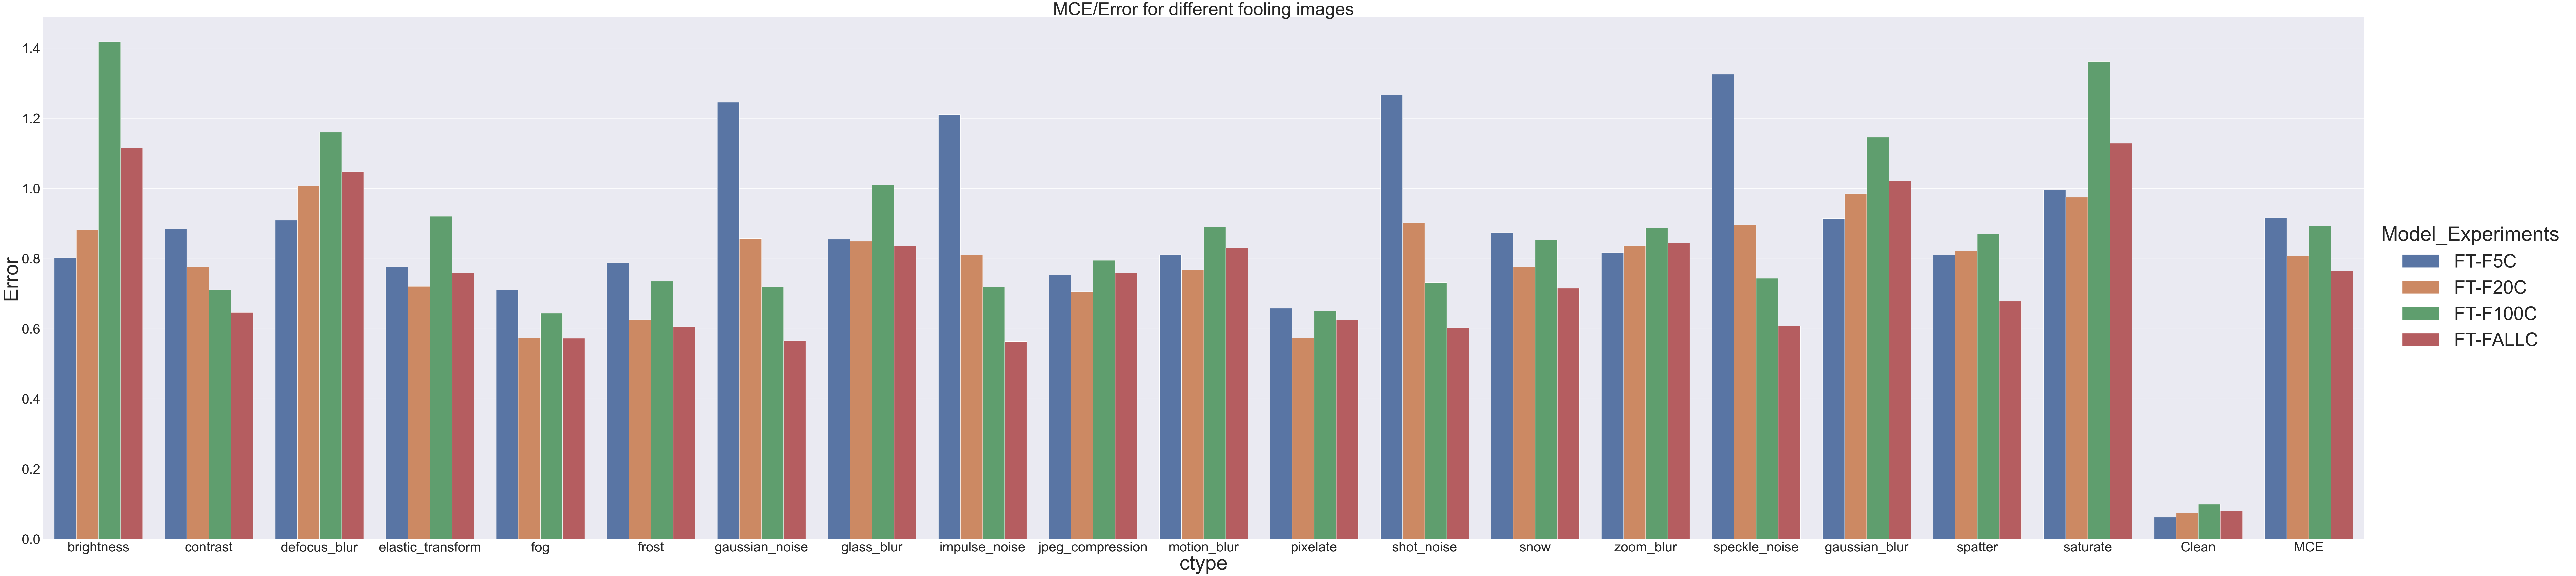

In [6]:
# comparing MCE across different fooling layer
temp_mce = mce[['ctype','FT-F5C','FT-F20C','FT-F100C','FT-FALLC',]]
temp_mce_df = pd.melt(temp_mce,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Error"})


print (temp_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Error',hue='Model_Experiments',data=temp_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("MCE/Error for different fooling images",fontsize=64)
g.savefig('MCE_Error for different fooling images.jpeg')
plt.show()

In [7]:

mce.columns.tolist()

['ctype',
 'FT-O-AugMix',
 'Baseline (fc-O)',
 'FT-O',
 'FT-F20',
 'FT-F20C',
 'FT-F20C-AugMix',
 'FT-F5C',
 'FT-F100C',
 'FT-FALLC',
 'FT-FALLC-AugMix']

## Relative MCE

                 ctype Model_Experiments  Rel_Error
0           brightness       FT-O-AugMix   1.372951
1             contrast       FT-O-AugMix   0.947831
2         defocus_blur       FT-O-AugMix   1.123839
3    elastic_transform       FT-O-AugMix   0.824176
4                  fog       FT-O-AugMix   0.572454
..                 ...               ...        ...
204      speckle_noise   FT-FALLC-AugMix   0.495726
205      gaussian_blur   FT-FALLC-AugMix   0.891724
206            spatter   FT-FALLC-AugMix   0.678761
207           saturate   FT-FALLC-AugMix   1.180064
209                MCE   FT-FALLC-AugMix   0.721622

[180 rows x 3 columns]


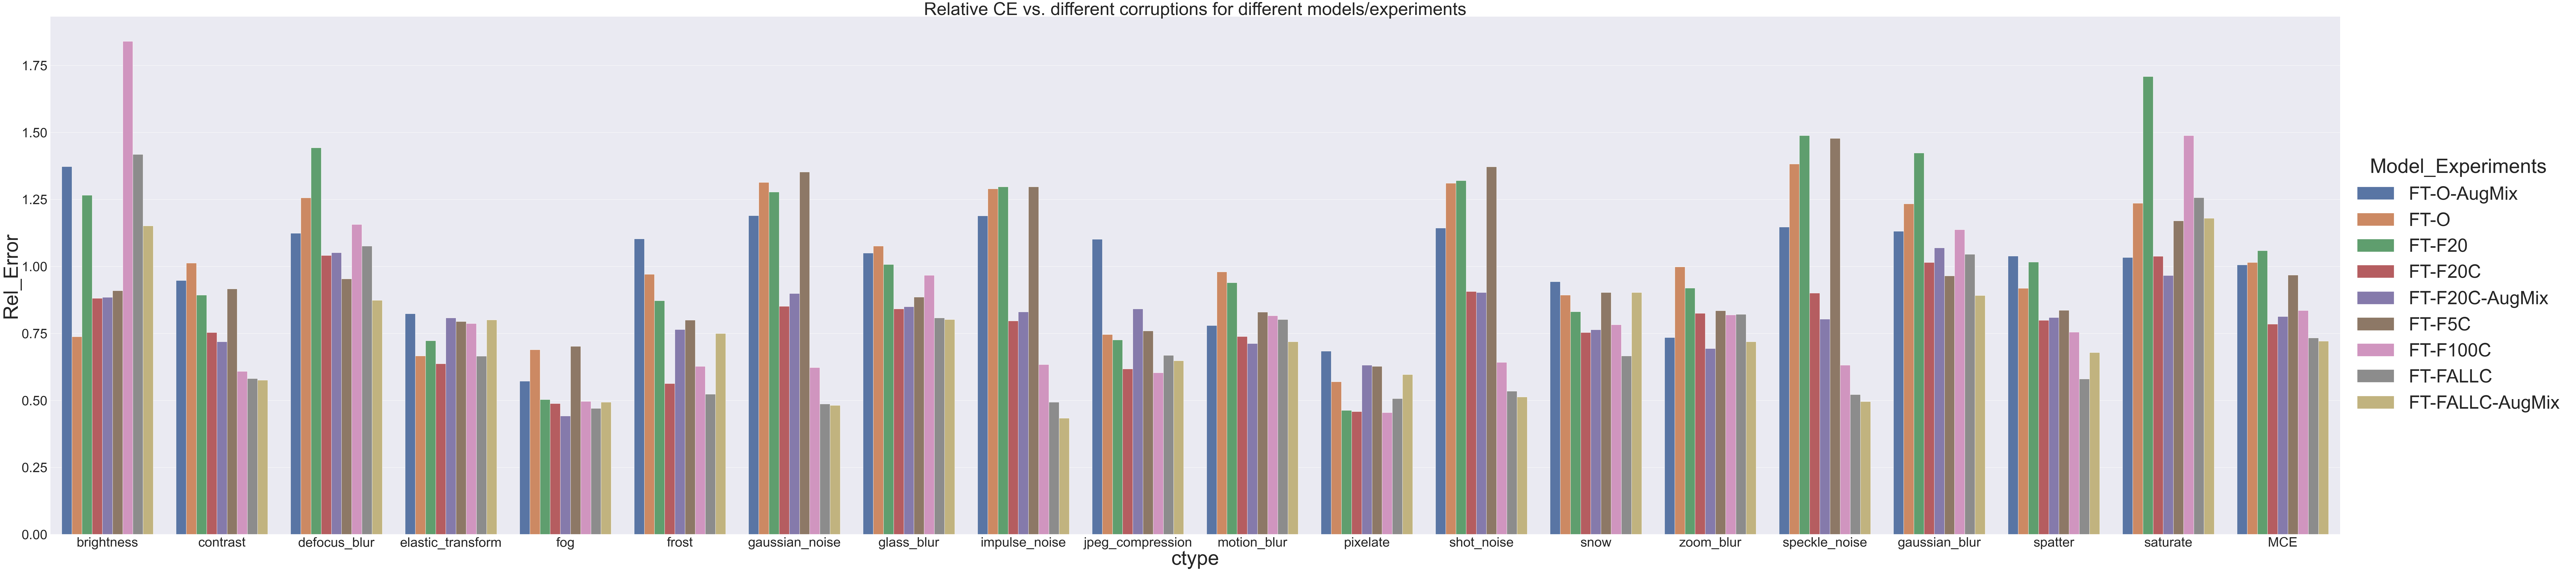

In [8]:
# comparing Relative MCE across different models

temp_rel_mce_df = pd.melt(rel_error,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Rel_Error"})

temp_rel_mce_df = temp_rel_mce_df[(temp_rel_mce_df['Model_Experiments']!='Baseline (fc-O)') & (temp_rel_mce_df['ctype']!='Clean')]
print (temp_rel_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Rel_Error',hue='Model_Experiments',data=temp_rel_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("Relative CE vs. different corruptions for different models/experiments",fontsize=64)
g.savefig('Rel_MCE_Error vs diff corruptions.jpeg')
plt.show()


                ctype Model_Experiments  Rel_Error
0          brightness              FT-O   0.737705
1            contrast              FT-O   1.012913
2        defocus_blur              FT-O   1.256347
3   elastic_transform              FT-O   0.666667
4                 fog              FT-O   0.689295
..                ...               ...        ...
78      speckle_noise   FT-FALLC-AugMix   0.495726
79      gaussian_blur   FT-FALLC-AugMix   0.891724
80            spatter   FT-FALLC-AugMix   0.678761
81           saturate   FT-FALLC-AugMix   1.180064
83                MCE   FT-FALLC-AugMix   0.721622

[80 rows x 3 columns]


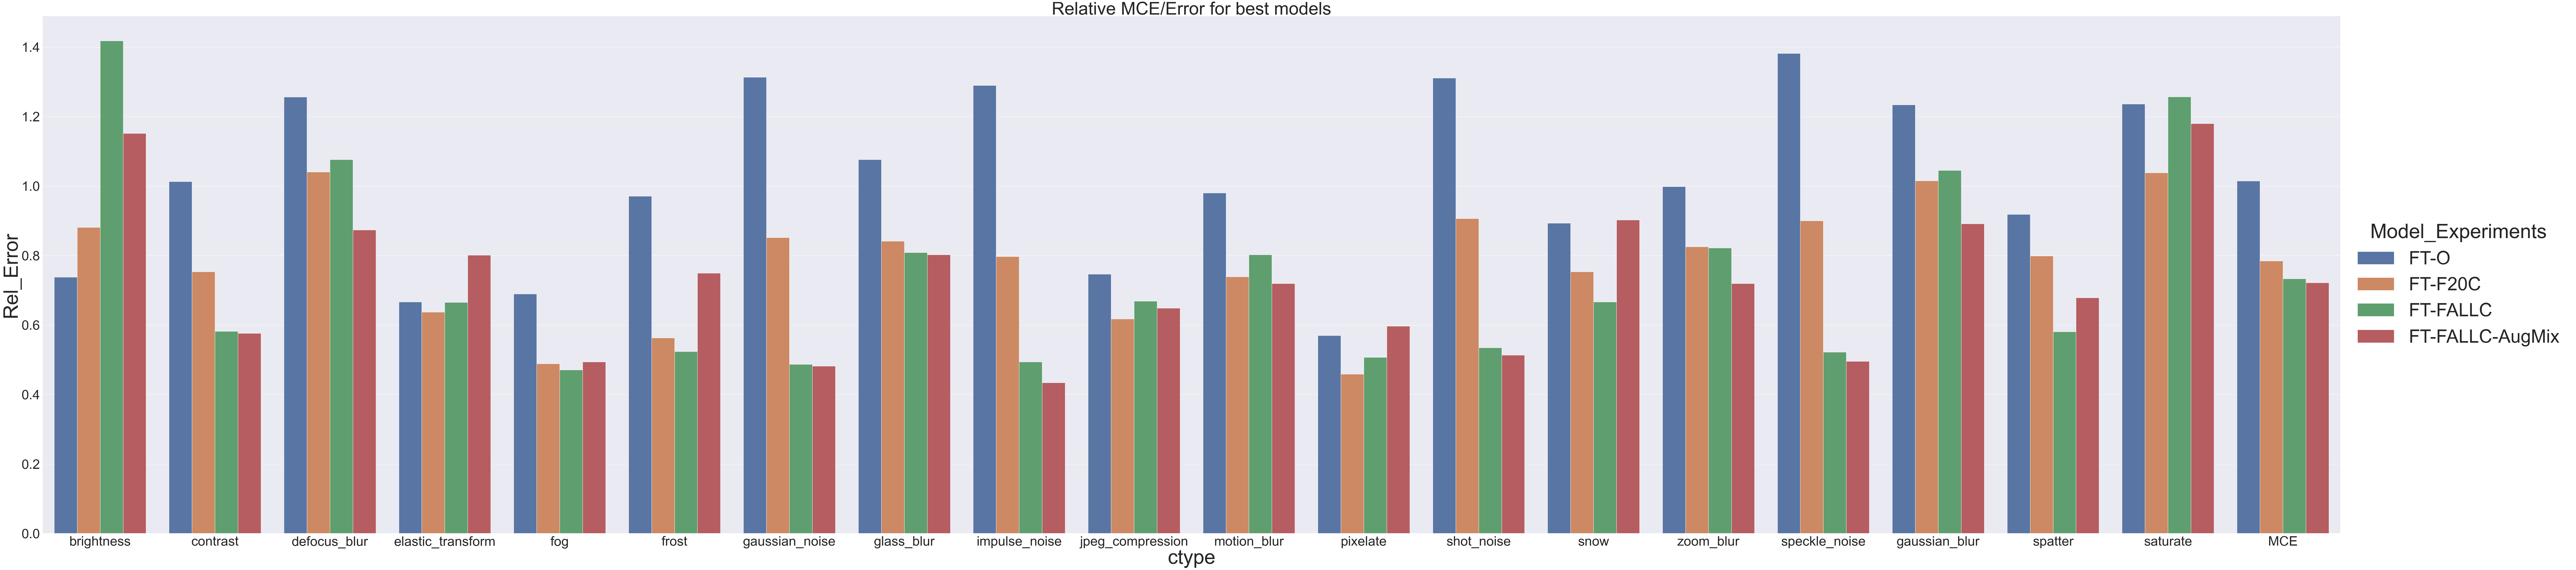

In [9]:
# comparing Relative MCE across best models
temp_rel_mce = rel_error[['ctype','FT-O','FT-F20C','FT-FALLC','FT-FALLC-AugMix']]
temp_rel_mce_df = pd.melt(temp_rel_mce,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Rel_Error"})
temp_rel_mce_df = temp_rel_mce_df[temp_rel_mce_df['ctype']!='Clean']

print (temp_rel_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Rel_Error',hue='Model_Experiments',data=temp_rel_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("Relative MCE/Error for best models",fontsize=64)
g.savefig('Relative MCE_Error for best models.jpeg')
plt.show()

                ctype Model_Experiments  Rel_Error
0          brightness            FT-F5C   0.909836
1            contrast            FT-F5C   0.916839
2        defocus_blur            FT-F5C   0.954180
3   elastic_transform            FT-F5C   0.794872
4                 fog            FT-F5C   0.702350
..                ...               ...        ...
78      speckle_noise          FT-FALLC   0.521978
79      gaussian_blur          FT-FALLC   1.045517
80            spatter          FT-FALLC   0.580531
81           saturate          FT-FALLC   1.257235
83                MCE          FT-FALLC   0.733256

[80 rows x 3 columns]


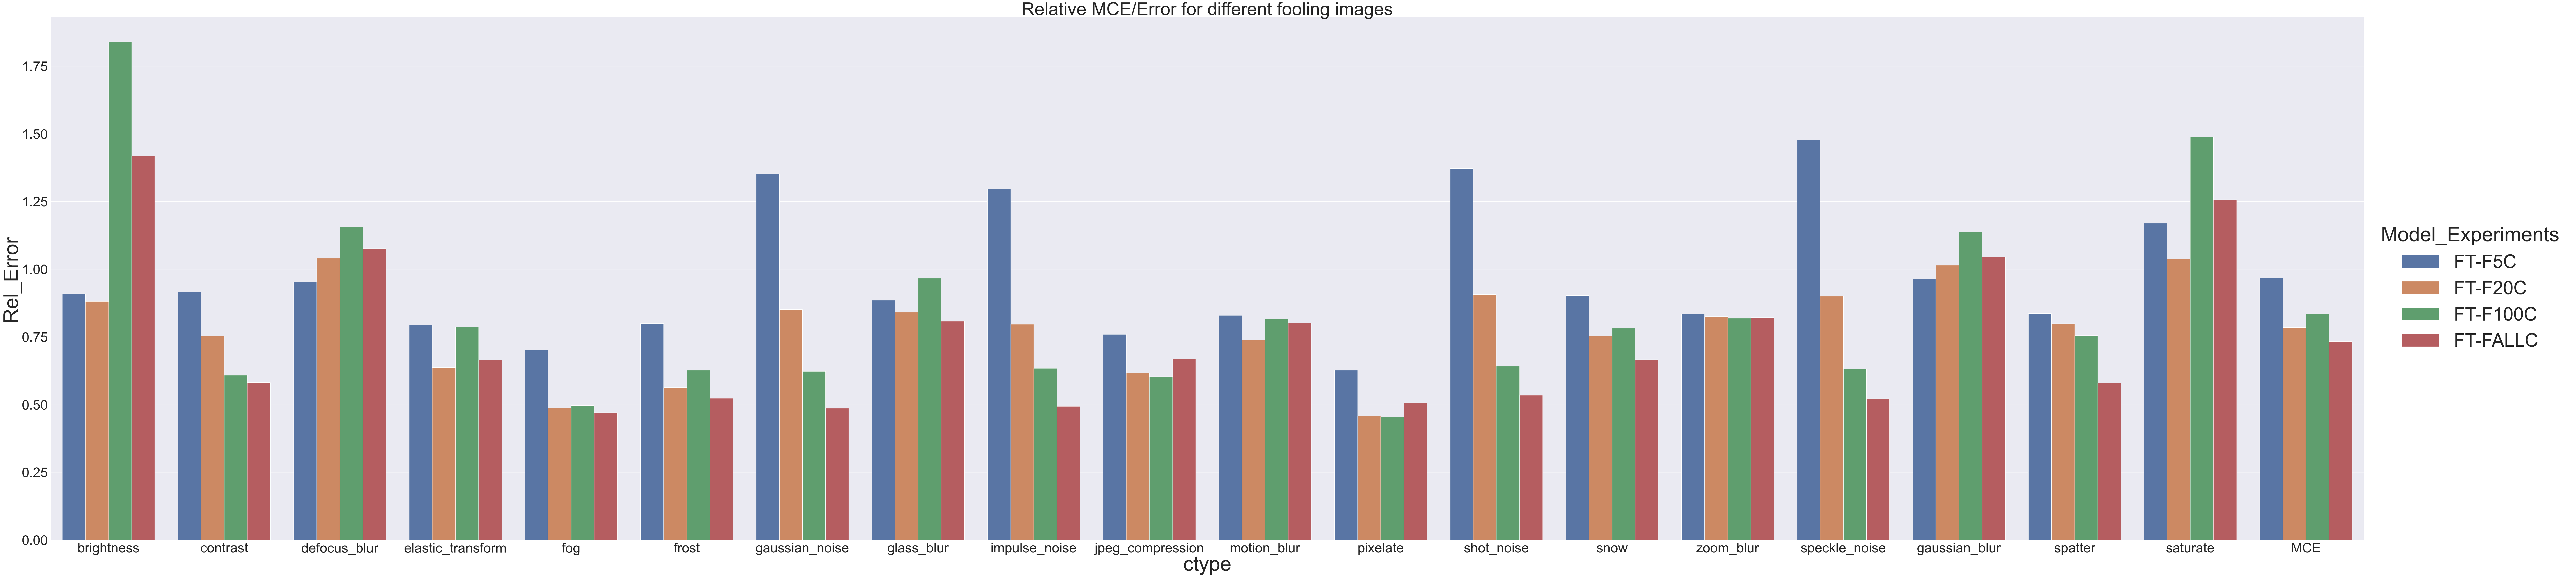

In [10]:
# comparing Relative MCE across different fooling layer

temp_rel_mce = rel_error[['ctype','FT-F5C','FT-F20C','FT-F100C','FT-FALLC',]]
temp_rel_mce_df = pd.melt(temp_rel_mce,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Rel_Error"})
temp_rel_mce_df = temp_rel_mce_df[temp_rel_mce_df['ctype']!='Clean']

print (temp_rel_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Rel_Error',hue='Model_Experiments',data=temp_rel_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("Relative MCE/Error for different fooling images",fontsize=64)
g.savefig('Relative MCE_Error for different fooling images.jpeg')
plt.show()

# Effect of AugMix

                 ctype Model_Experiments     Error
0           brightness              FT-O  0.829596
1             contrast              FT-O  0.989411
2         defocus_blur              FT-O  1.178431
3    elastic_transform              FT-O  0.740354
4                  fog              FT-O  0.731221
..                 ...               ...       ...
120      speckle_noise   FT-FALLC-AugMix  0.626272
121      gaussian_blur   FT-FALLC-AugMix  0.945600
122            spatter   FT-FALLC-AugMix  0.801929
123           saturate   FT-FALLC-AugMix  1.159503
125                MCE   FT-FALLC-AugMix  0.808499

[120 rows x 3 columns]


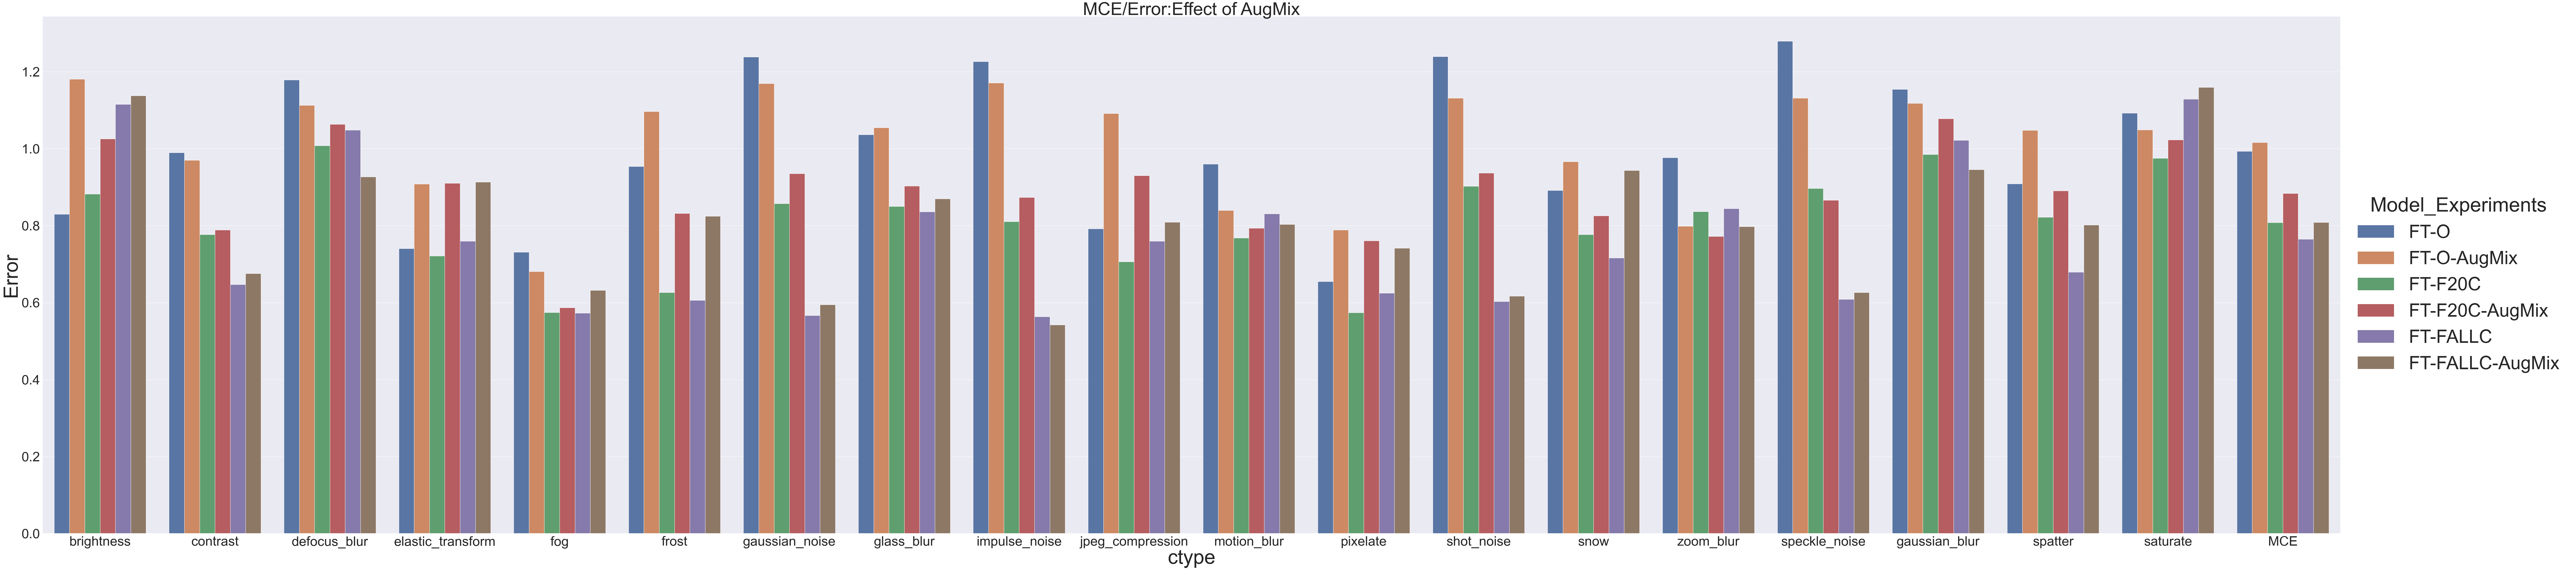

In [11]:
#effect of AugMix on  MCE

temp_mce = mce[['ctype','FT-O','FT-O-AugMix','FT-F20C','FT-F20C-AugMix','FT-FALLC','FT-FALLC-AugMix']]
temp_mce_df = pd.melt(temp_mce,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Error"})
temp_mce_df = temp_mce_df[temp_mce_df['ctype']!='Clean']

print (temp_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Error',hue='Model_Experiments',data=temp_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("MCE/Error:Effect of AugMix",fontsize=64)
g.savefig('MCE_Error-Effect of AugMix.jpeg')
plt.show()


                 ctype Model_Experiments  Rel_Error
0           brightness              FT-O   0.737705
1             contrast              FT-O   1.012913
2         defocus_blur              FT-O   1.256347
3    elastic_transform              FT-O   0.666667
4                  fog              FT-O   0.689295
..                 ...               ...        ...
120      speckle_noise   FT-FALLC-AugMix   0.495726
121      gaussian_blur   FT-FALLC-AugMix   0.891724
122            spatter   FT-FALLC-AugMix   0.678761
123           saturate   FT-FALLC-AugMix   1.180064
125                MCE   FT-FALLC-AugMix   0.721622

[120 rows x 3 columns]


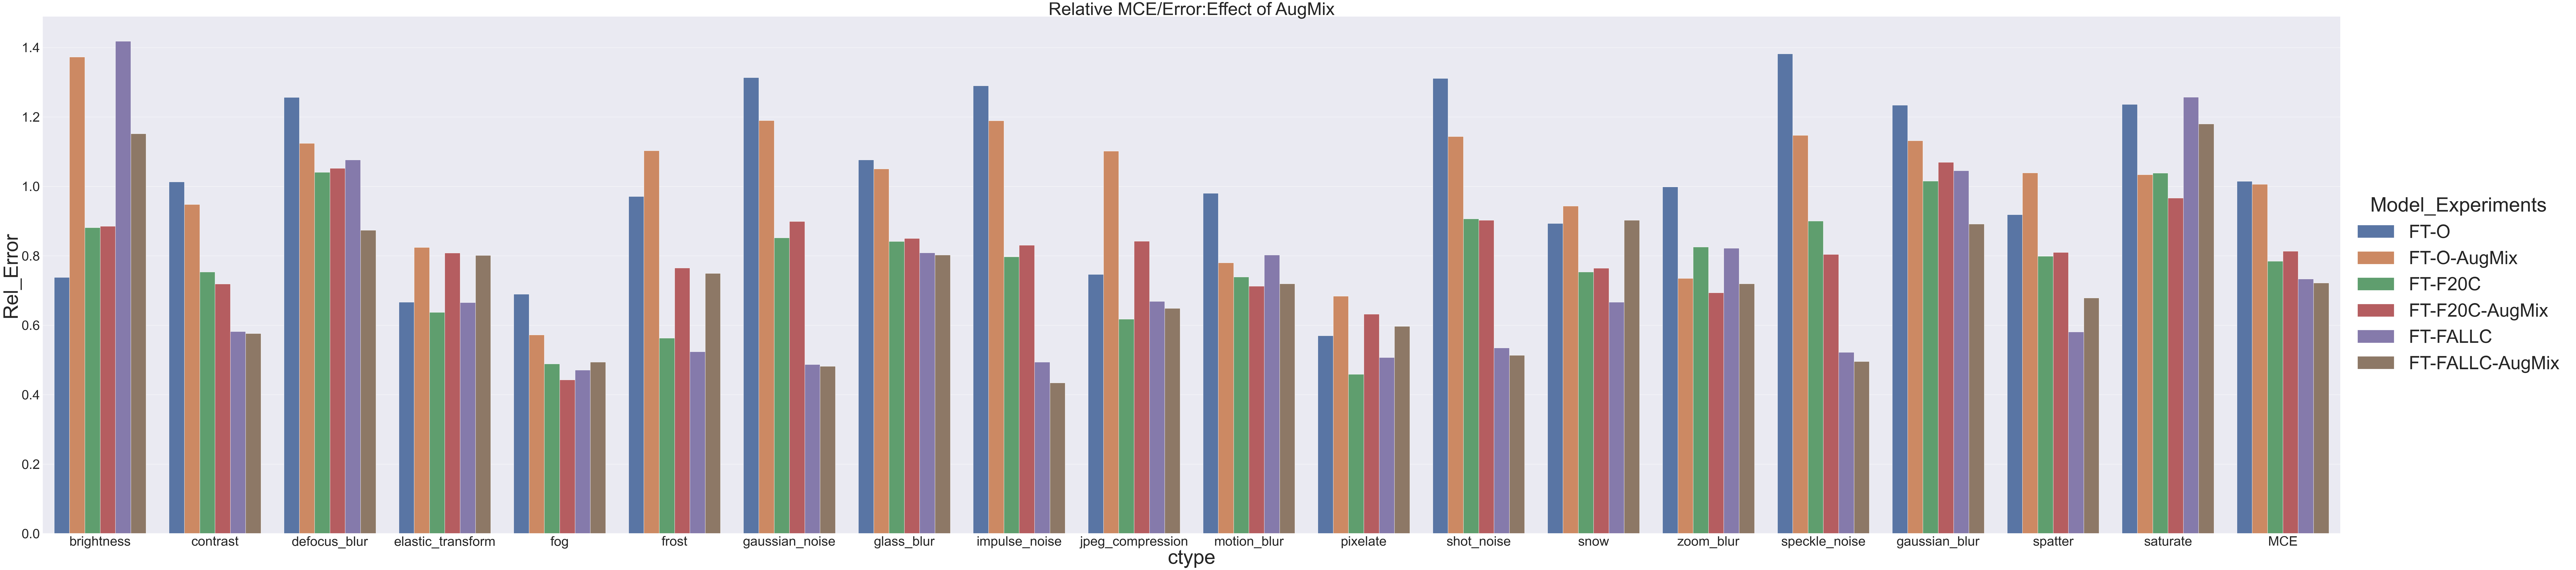

In [12]:
#effect of AugMix on  Relative MCE: Robustness to corruption

temp_rel_mce = rel_error[['ctype','FT-O','FT-O-AugMix','FT-F20C','FT-F20C-AugMix','FT-FALLC','FT-FALLC-AugMix']]
temp_rel_mce_df = pd.melt(temp_rel_mce,id_vars = "ctype").rename(columns = {"variable":"Model_Experiments","value":"Rel_Error"})
temp_rel_mce_df = temp_rel_mce_df[temp_rel_mce_df['ctype']!='Clean']

print (temp_rel_mce_df)
sns.set(font_scale=6)
g = sns.catplot(x='ctype',y='Rel_Error',hue='Model_Experiments',data=temp_rel_mce_df,kind='bar',height=30, aspect=4)
plt.tick_params(axis='both', which='major', labelsize=48)
plt.title("Relative MCE/Error:Effect of AugMix",fontsize=64)
g.savefig('Relative MCE_Error-Effect of AugMix.jpeg')
plt.show()

## Analyzing Fooling-5,20,100 combined with clean data

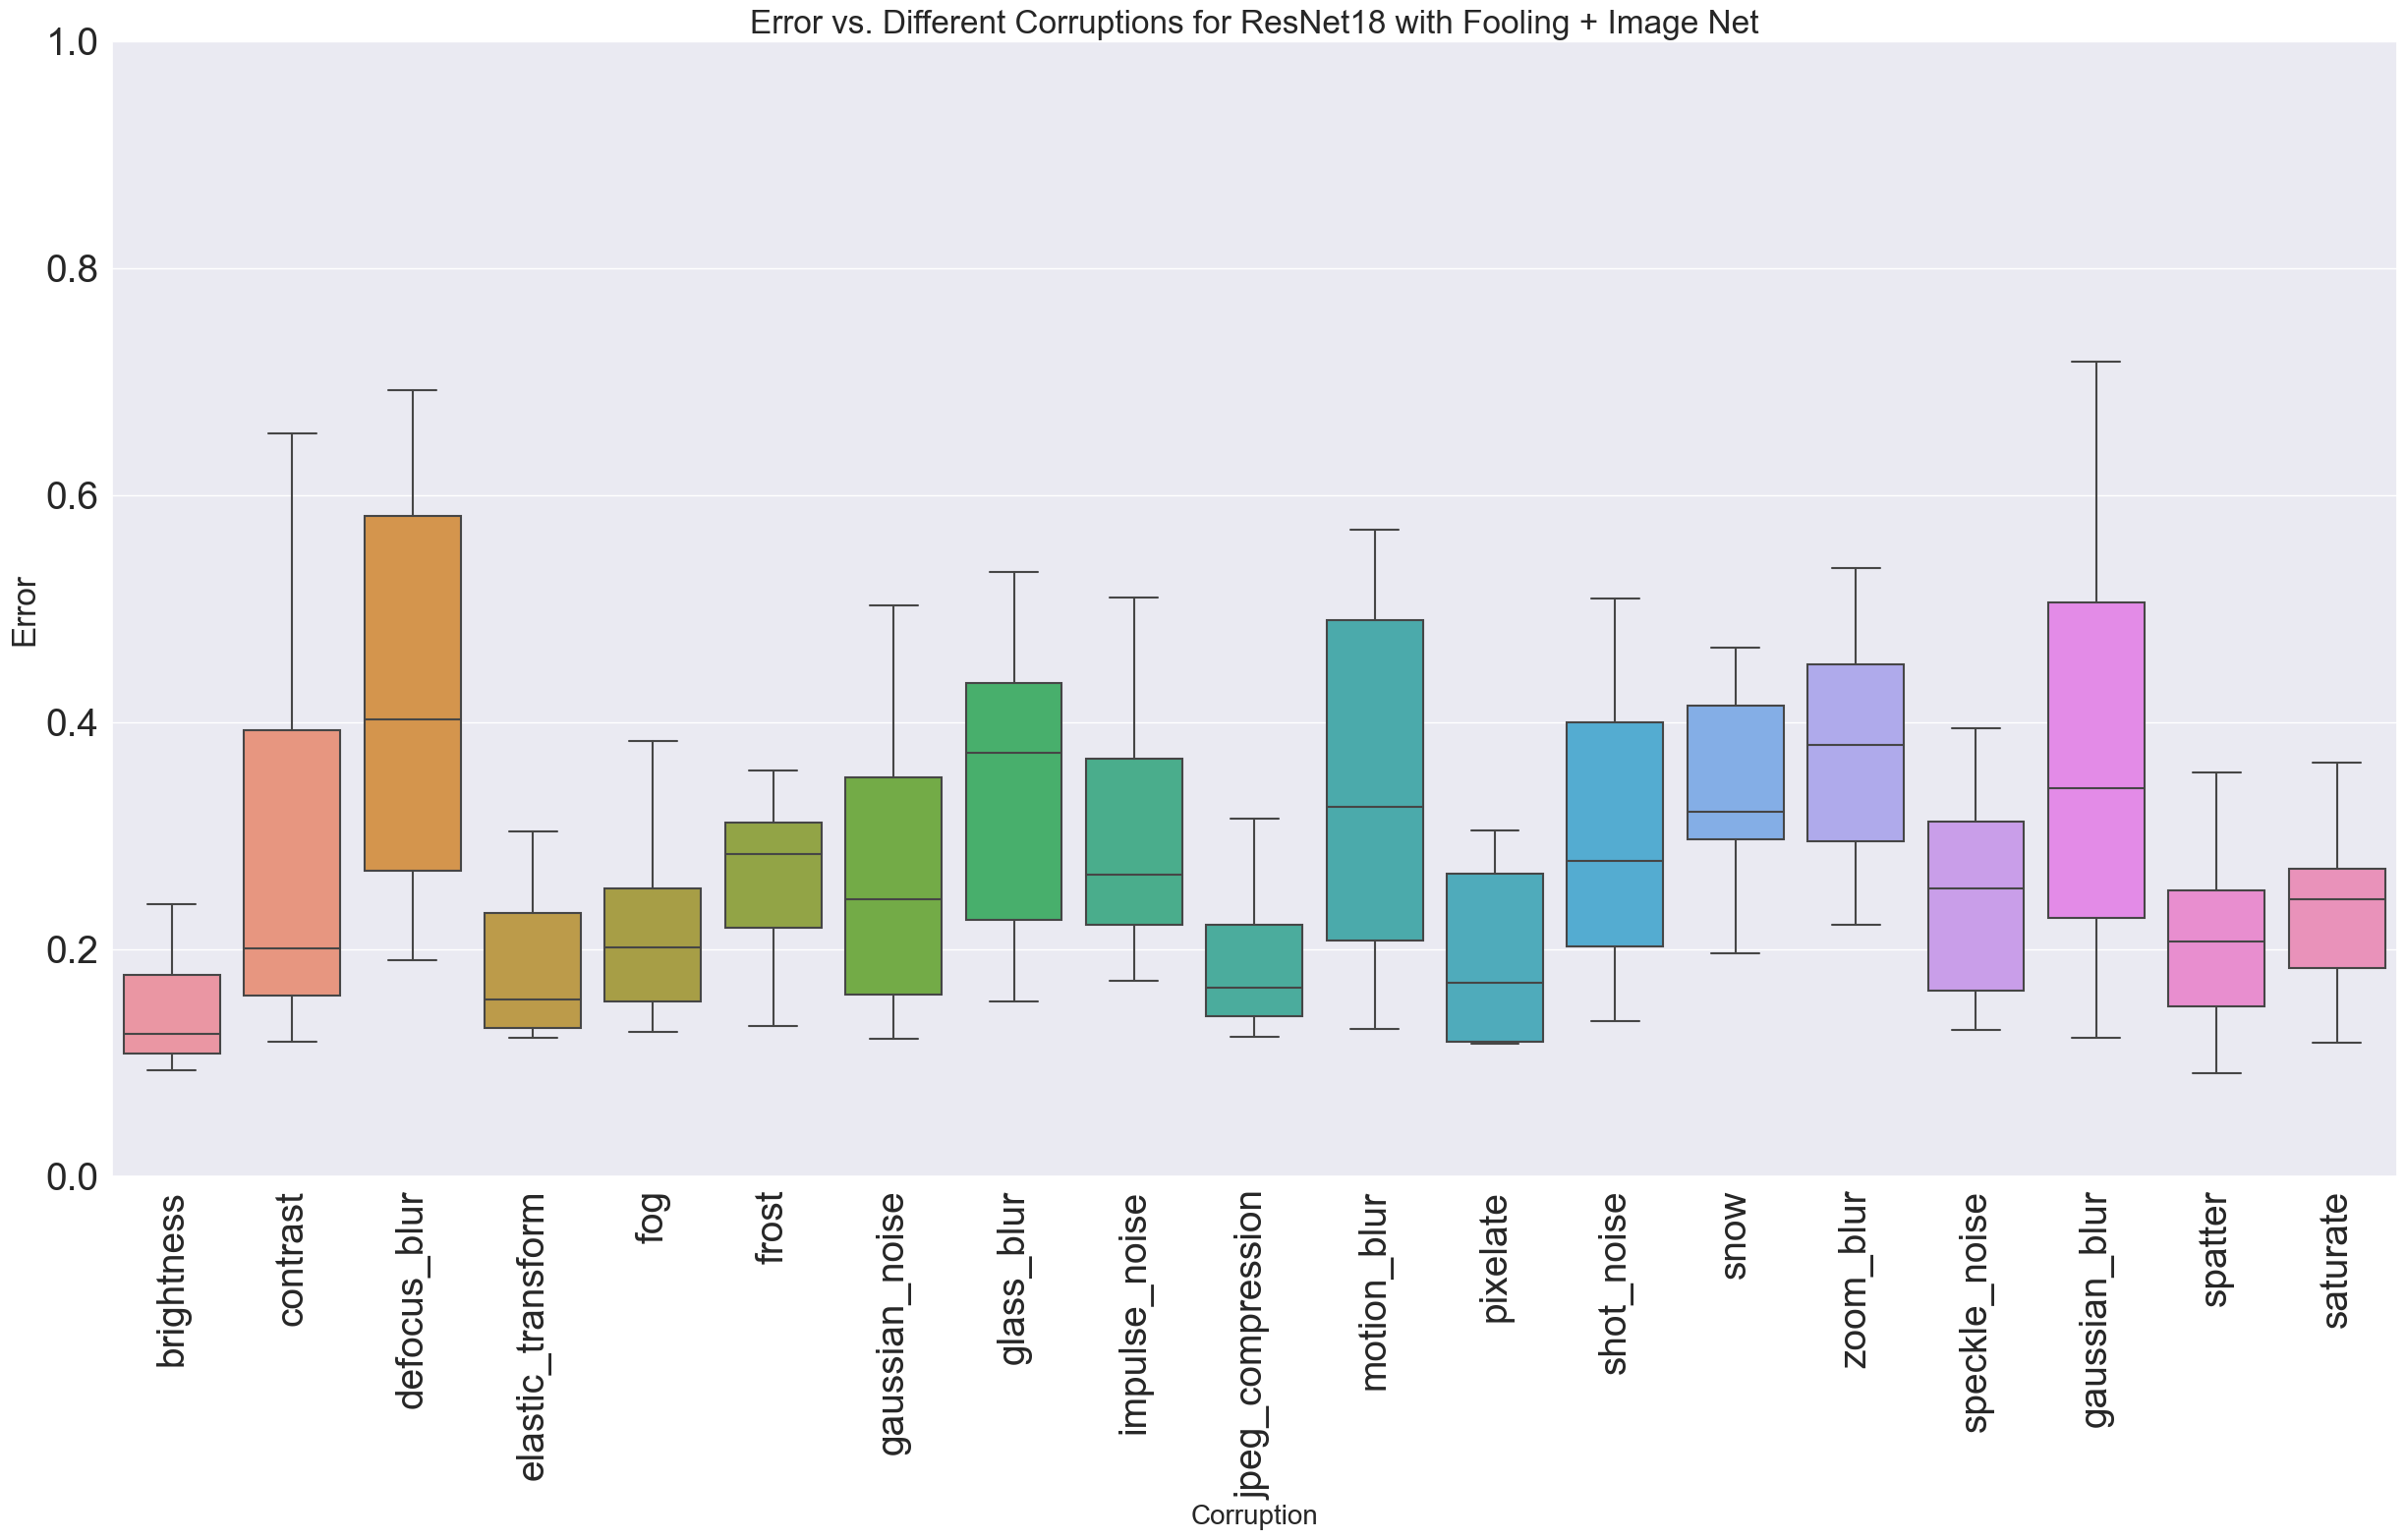

In [17]:
#plotting the data: Harder to classify corruptions


fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.boxplot(x="Corruptions", y="FT-FALLC",data=raw_error)

plt.xticks(rotation=90)

plt.rcParams.update({'font.size':12})
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
plt.xlabel("Corruption", fontsize=20)
plt.ylabel("Error",fontsize=24)
plt.ylim(0,1)
plt.title("Error vs. Different Corruptions for ResNet18 with Fooling + Image Net",fontsize=24)

#plt.legend(loc='upper right',fontsize=12)
#plt.grid()
plt.savefig('Best model error across corruptions.jpeg')
plt.show()

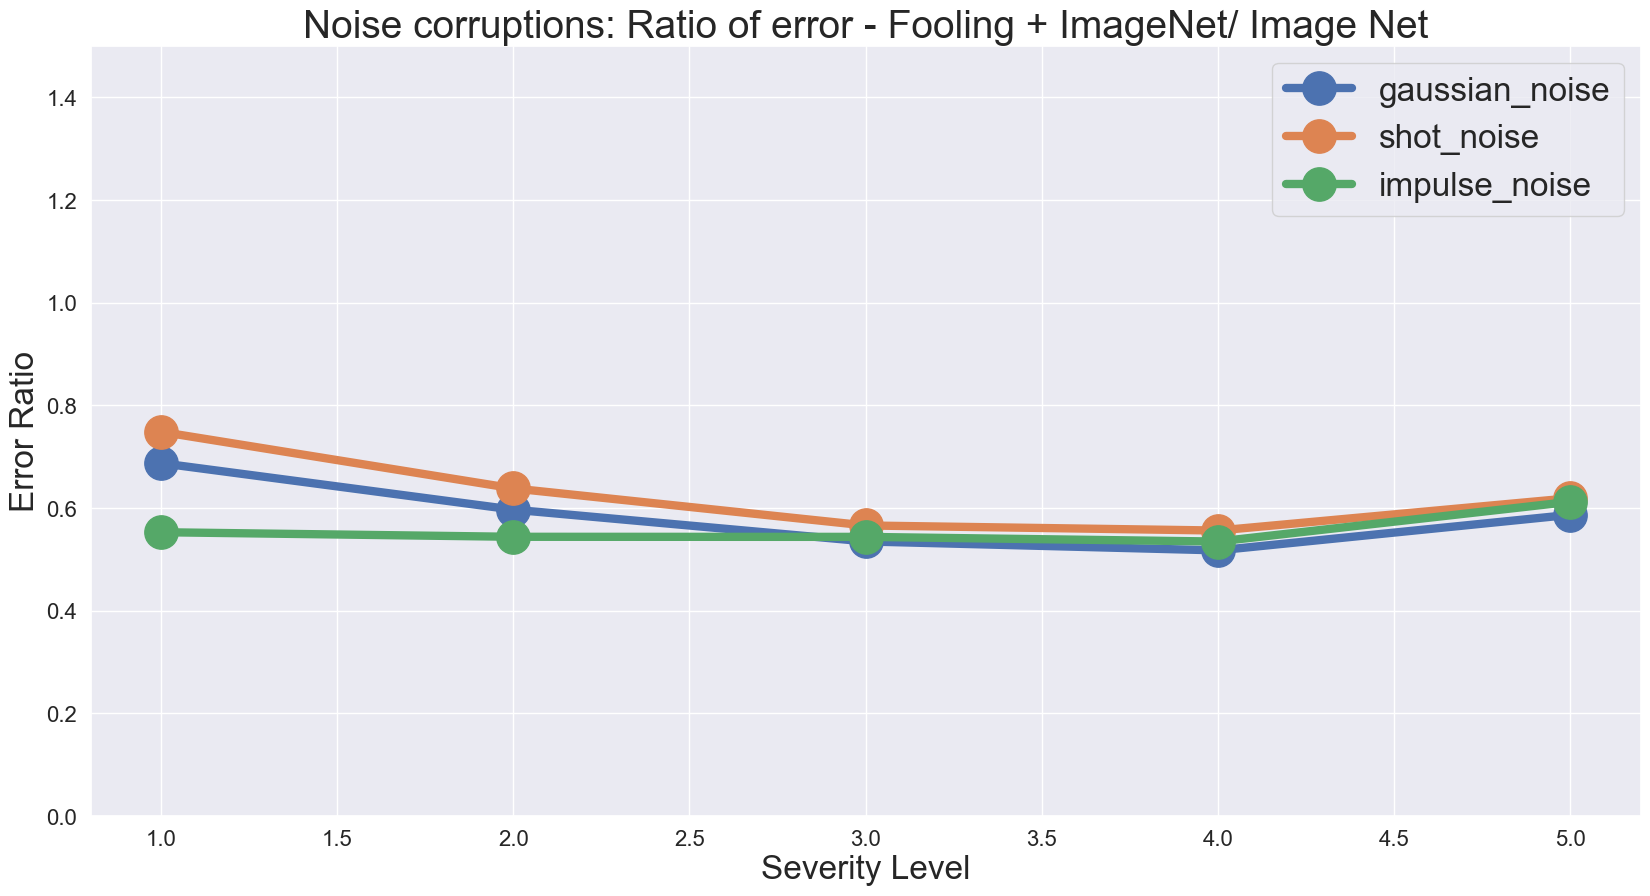

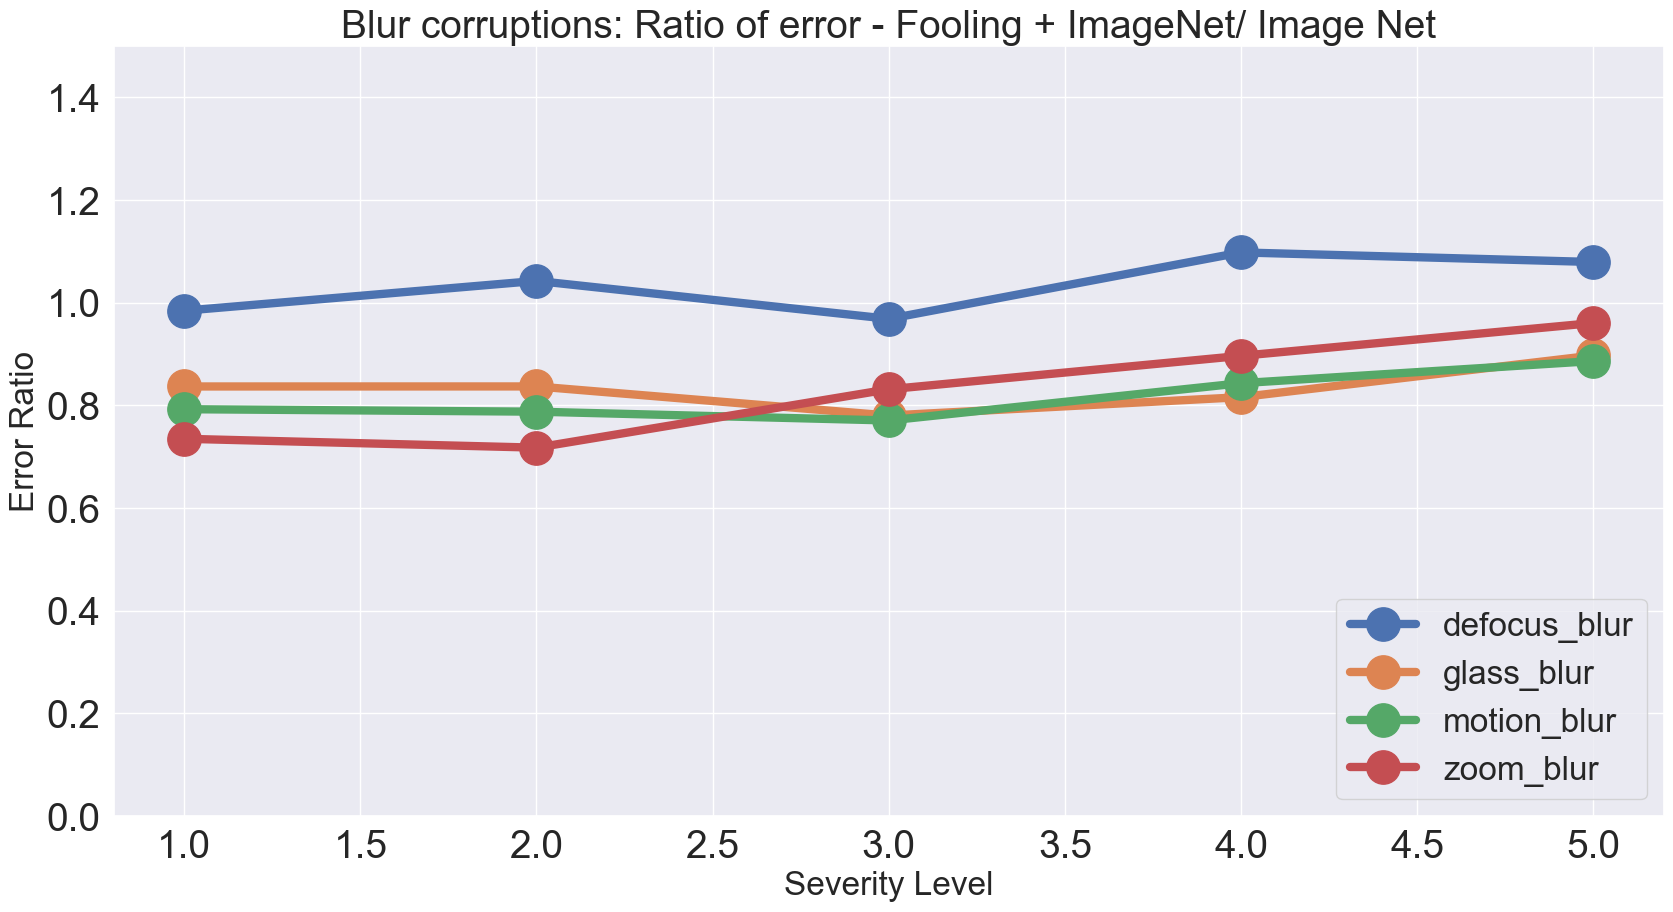

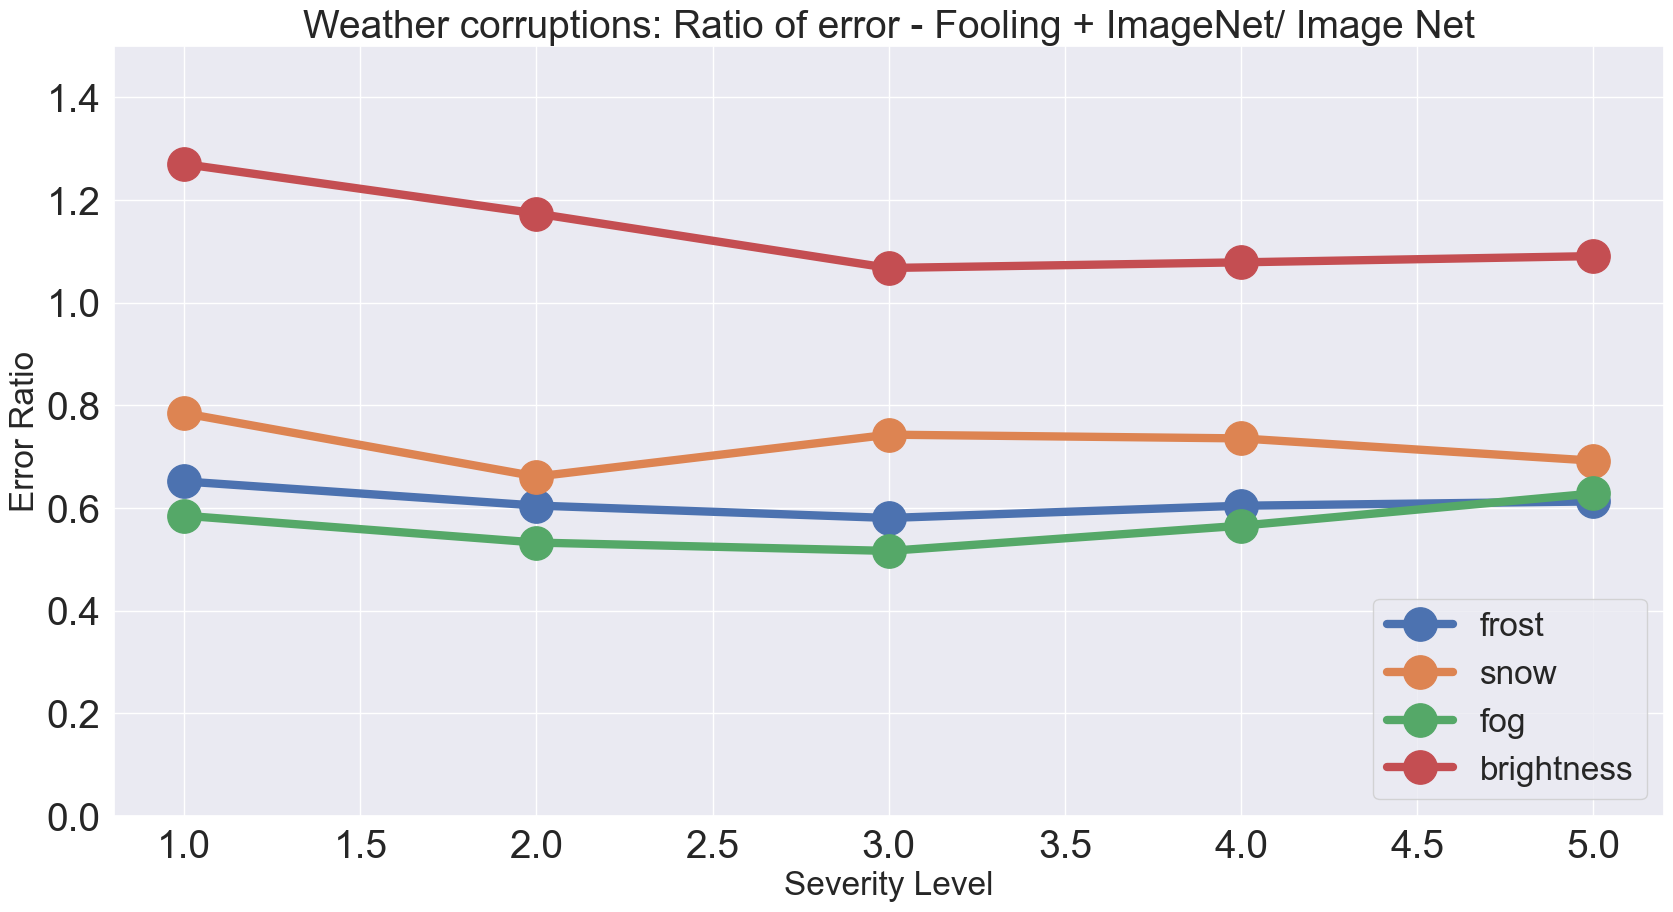

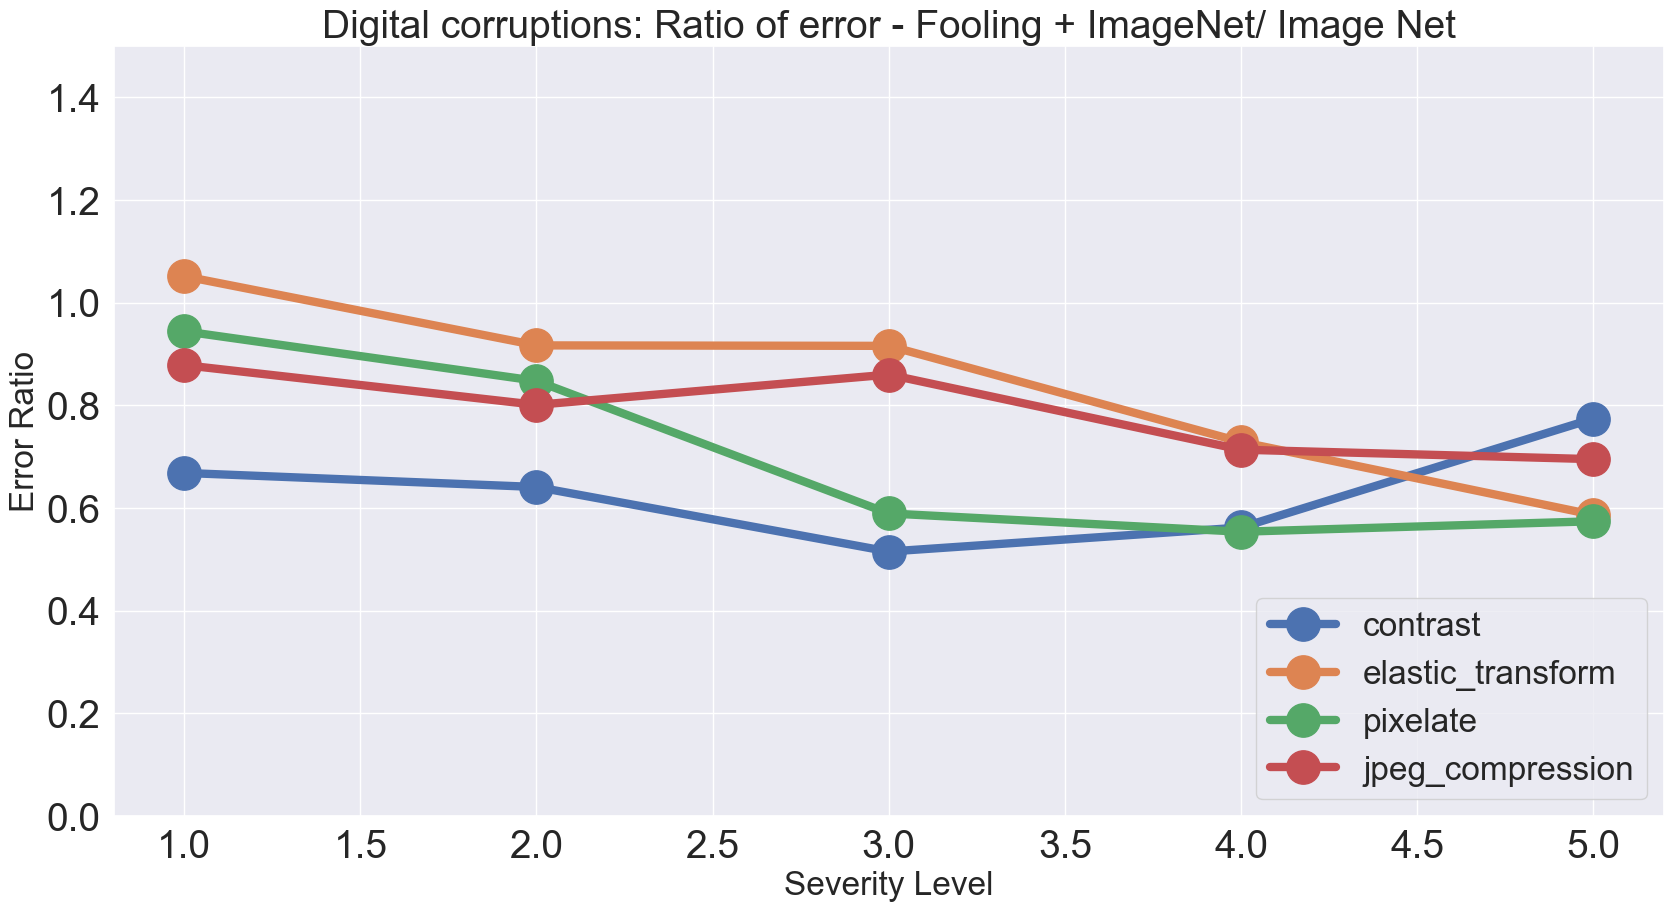

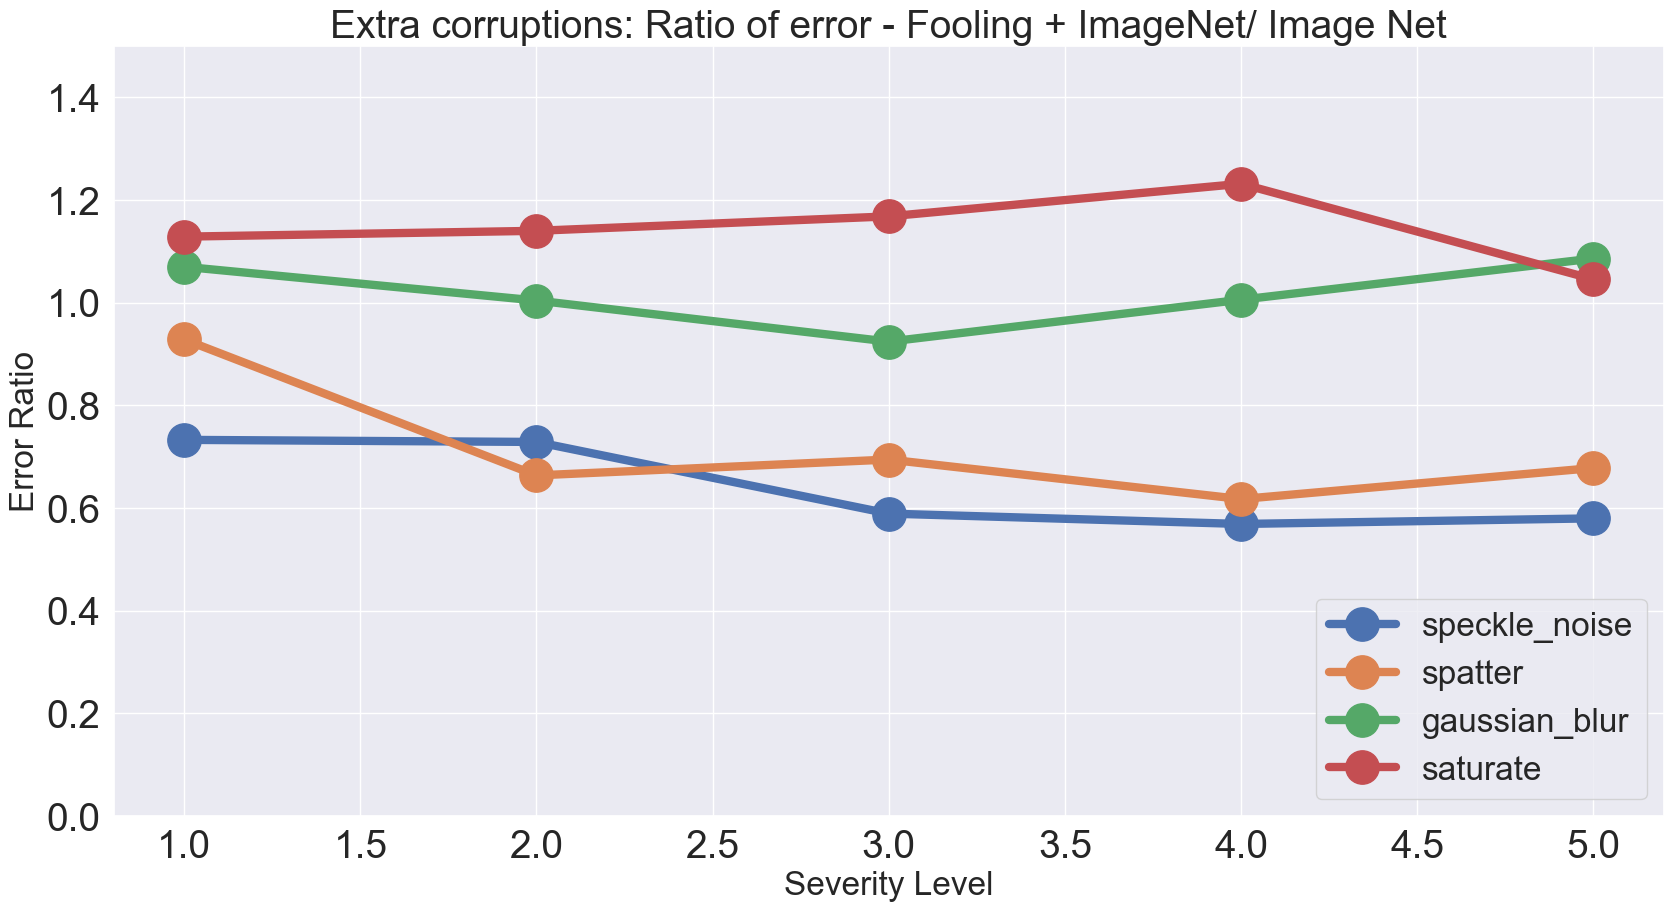

In [14]:
#per severity level comparison
#noise
raw_error['FALLC/Baseline'] = raw_error['FT-FALLC']/raw_error['Baseline (fc-O)']

f, ax1 = plt.subplots()
f.set_size_inches(20,10)

for ctype in noise:
    subset_df = raw_error[raw_error['Corruptions']==ctype]
    plt.plot(subset_df['Severity'],subset_df['FALLC/Baseline'],'-o',markersize =24,linewidth=6,label=ctype)

plt.xlabel("Severity Level",fontsize=24)
plt.ylabel('Error Ratio',fontsize=24)

#plt.xlim(0,4)
plt.ylim(0,1.5)

plt.rcParams.update({'font.size':24})
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
plt.title('Noise corruptions: Ratio of error - Fooling + ImageNet/ Image Net',fontsize =28)
plt.legend(loc='upper right',fontsize=24)

#plt.grid()
plt.savefig('Noise ecorruptions_Performance Ratio_Fooling+ImageNet.jpeg')

plt.show()

#blur
f, ax1 = plt.subplots()
f.set_size_inches(20,10)

for ctype in blur:
    subset_df = raw_error[raw_error['Corruptions']==ctype]
    plt.plot(subset_df['Severity'],subset_df['FALLC/Baseline'],'-o',markersize =24,linewidth=6,label=ctype)

plt.xlabel("Severity Level",fontsize=24)
plt.ylabel('Error Ratio',fontsize=24)

#plt.xlim(0,4)
plt.ylim(0,1.5)

plt.rcParams.update({'font.size':24})
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
plt.title('Blur corruptions: Ratio of error - Fooling + ImageNet/ Image Net',fontsize =28)
plt.legend(loc='lower right',fontsize=24)

#plt.grid()
plt.savefig('Blur ecorruptions_Performance Ratio_Fooling+ImageNet.jpeg')

plt.show()

#Weather
f, ax1 = plt.subplots()
f.set_size_inches(20,10)

for ctype in weather:
    subset_df = raw_error[raw_error['Corruptions']==ctype]
    plt.plot(subset_df['Severity'],subset_df['FALLC/Baseline'],'-o',markersize =24,linewidth=6,label=ctype)

plt.xlabel("Severity Level",fontsize=24)
plt.ylabel('Error Ratio',fontsize=24)

#plt.xlim(0,4)
plt.ylim(0,1.5)

plt.rcParams.update({'font.size':24})
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
plt.title('Weather corruptions: Ratio of error - Fooling + ImageNet/ Image Net',fontsize =28)
plt.legend(loc='lower right',fontsize=24)

#plt.grid()
plt.savefig('Weather ecorruptions_Performance Ratio_Fooling+ImageNet.jpeg')

plt.show()


#Digital
f, ax1 = plt.subplots()
f.set_size_inches(20,10)

for ctype in digital:
    subset_df = raw_error[raw_error['Corruptions']==ctype]
    plt.plot(subset_df['Severity'],subset_df['FALLC/Baseline'],'-o',markersize =24,linewidth=6,label=ctype)

plt.xlabel("Severity Level",fontsize=24)
plt.ylabel('Error Ratio',fontsize=24)

#plt.xlim(0,4)
plt.ylim(0,1.5)

plt.rcParams.update({'font.size':24})
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
plt.title('Digital corruptions: Ratio of error - Fooling + ImageNet/ Image Net',fontsize =28)
plt.legend(loc='lower right',fontsize=24)

#plt.grid()
plt.savefig('Digital ecorruptions_Performance Ratio_Fooling+ImageNet.jpeg')

plt.show()

#Extra
f, ax1 = plt.subplots()
f.set_size_inches(20,10)

for ctype in extra:
    subset_df = raw_error[raw_error['Corruptions']==ctype]
    plt.plot(subset_df['Severity'],subset_df['FALLC/Baseline'],'-o',markersize =24,linewidth=6,label=ctype)

plt.xlabel("Severity Level",fontsize=24)
plt.ylabel('Error Ratio',fontsize=24)

#plt.xlim(0,4)
plt.ylim(0,1.5)

plt.rcParams.update({'font.size':24})
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
plt.title('Extra corruptions: Ratio of error - Fooling + ImageNet/ Image Net',fontsize =28)
plt.legend(loc='lower right',fontsize=24)

#plt.grid()
plt.savefig('Extra ecorruptions_Performance Ratio_Fooling+ImageNet.jpeg')

plt.show()

In [15]:
print (raw_error['Corruptions'].unique().tolist())

['brightness', 'contrast', 'defocus_blur', 'elastic_transform', 'fog', 'frost', 'gaussian_noise', 'glass_blur', 'impulse_noise', 'jpeg_compression', 'motion_blur', 'pixelate', 'shot_noise', 'snow', 'zoom_blur', 'speckle_noise', 'gaussian_blur', 'spatter', 'saturate']


In [16]:
noise = ['gaussian_noise','shot_noise','impulse_noise']
blur= ['defocus_blur','glass_blur','motion_blur','zoom_blur']
weather = ['frost','snow','fog','brightness']
digital = ['contrast','elastic_transform','pixelate','jpeg_compression']
extra = ['speckle_noise','spatter','gaussian_blur','saturate']